## Forum pageviews (Time Series Analysis)

In [1]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the dataset

dataset = pd.read_csv('forum-pageviews.csv')
dataset.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [3]:
# creat a series

series = pd.read_csv('forum-pageviews.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)
series.head()

date
2016-05-09     1201
2016-05-10     2329
2016-05-11     1716
2016-05-12    10539
2016-05-13     6933
Name: value, dtype: int64

In [5]:
# Descriptive statistics

series.describe()

count    1.304000e+03
mean     6.722068e+04
std      5.933964e+04
min      1.201000e+03
25%      3.575775e+04
50%      5.719750e+04
75%      8.388300e+04
max      1.173655e+06
Name: value, dtype: float64

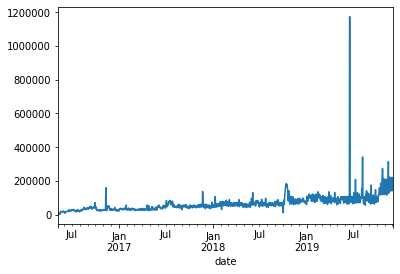

In [6]:
series.plot()